In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [26]:
from google.colab import files
upload = files.upload()

Saving HousePricePredictionSheet1.csv to HousePricePredictionSheet1 (1).csv


In [27]:
df = pd.read_csv('HousePricePredictionSheet1.csv')

In [28]:
df.shape

(2919, 13)

In [51]:
df.head(3)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


Displayed the first three rows of the entire dataset with this function.

In [30]:
df.drop_duplicates(inplace = True)

now we will clean the data and apply preprocessing.

In [31]:
df.shape

(2919, 13)

In [32]:
df.drop(columns = ['Id'], inplace = True)

In [33]:
df.head(3)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [34]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
BsmtFinSF2,1


since shown a ove data of salesprice null values is very high and we need to evaluate that during this project, we have to get rid of them.
We will do that by using simple imputer by sklearn which will add in the mean value of the saleprice where a null value is present.

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['SalePrice']])

SimpleImputer()

In [36]:
imputer.statistics_

array([180921.19589041])

In [37]:
df['SalePrice'] = imputer.transform(df[['SalePrice']])

In [38]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
BsmtFinSF2,1


The null values of Sale Price have be treated here.

In [39]:
df = df.fillna(0)

In [40]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


Here we performed the manual removal of the remaining fields null values since the null values were not that high.

In [41]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


Here we performed discribe function on the dataset. We are able to see the statistics for dataset.

Here we noticed a huge gap between the numbers in 75% and maximum count values of LotArea. This represents presence of outliers.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualization of Outliers present in LotArea through box plot through seaborn.

In [43]:
sns.set_style('darkgrid')

styling function in seaborn with dark grey background. default for statistical plots

<Axes: ylabel='LotArea'>

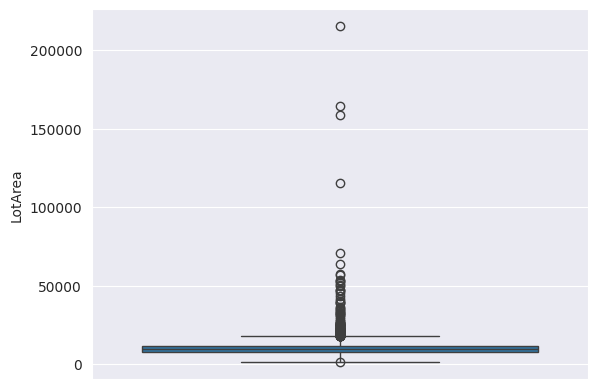

In [44]:
sns.boxplot(df, y = 'LotArea')

The datapoints represented by circles are the outliers.

In [45]:
import numpy as np

Handling Outliers. Interquartile Range method used to handle them.

In [46]:
Q1 = np.percentile(df['LotArea'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['LotArea'], 75, interpolation = 'midpoint')

In [47]:
IQR = Q3 - Q1

In [48]:
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

Any value exceeding both are considered outlier.

Setting threshold for upperbound and lowerbound

In [49]:
df = df[(df.LotArea < upperbound) & (df.LotArea > lowerbound)]

In [50]:
df.shape

(2791, 12)

Here we noticed a significant change in the numbers abouve from the previous, showing successful removal of outliers.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


Int denotes integer datatype and Object denotes string datatype.

In [54]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


Here we notice that both numerical and categorical values exist in data. so we will convert categorical value to numerical to be able to process it further.

In [55]:
cat_col = df.select_dtypes(include = 'object').columns.tolist()

In [82]:
cat_col

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

Object datatype containing columns listed here.

In [83]:
encoded_cols = encoder.get_feature_names_out(cat_col)

get_feature_names_out used to get the columns with categorical data here.

In [84]:
encoded_cols

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [85]:
df[encoded_cols] = encoder.transform(df[cat_col])

In [86]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


new columns added with values of 0 and 1 for categories

In [87]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice', 'MSZoning_0', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

Noow further SalePrice is the only target variable and other than that we will feed it all to the model as input features.

In [88]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']

In [89]:
X

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
X = pd.get_dummies(X)

used to convert categorical (text) columns into numbers, so that machine learning algorithms.

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

converts data toin between the range of 0 and 1

In [92]:
X[:] = scaler.transform(X)

[:] added to help the transformed data to be stored in the format of dataframe.

In [93]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_0,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.430838,0.500,0.949275,0.883333,0.0,0.266999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.501821,0.875,0.753623,0.433333,0.0,0.393637,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.603666,0.500,0.934783,0.866667,0.0,0.286962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.498735,0.500,0.311594,0.333333,0.0,0.235808,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.789457,0.500,0.927536,0.833333,0.0,0.357143,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.823529,0.003457,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,0.823529,0.028764,0.750,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.823529,0.026171,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,0.382353,0.553731,0.500,0.869565,0.700000,0.0,0.284467,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dividing of dataset

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 69), (559, 69), (2232,), (559,))

80% dataset id traning set and 20% data set is in testing set.

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

import linear regression module
create object of LR class
create fit method


In [98]:
y_pred = model.predict(X_test)

y_pred contains the prediction variables. prediction values of y test

In [99]:
y_test[:5]

,SalePrice
2888,180921.19589
2364,180921.19589
2075,180921.19589
2564,180921.19589
2216,180921.19589


orignal first five values of the y_test

In [100]:
y_pred[:5]

array([119484.42112394, 186040.93331867, 143679.23509416, 118680.6435233 ,
       134031.66033596])

prediction of the first 5

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
mean_absolute_error(y_test, y_pred)

30415.99726440279

In [111]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

Lasso- L1 regularizarion: reduce mean_absolute_error

In [112]:
lasso_pred = lasso_model.predict(X_test)

In [113]:
mean_absolute_error(y_test, lasso_pred)

30425.80639205752

In [114]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

Ridge regression: L2 regularization, same work like l1

In [115]:
ridge_pred = ridge_model.predict(X_test)

redge pred var: stores ridge model values

In [116]:
mean_absolute_error(y_test, ridge_pred)

30171.244181545135